
  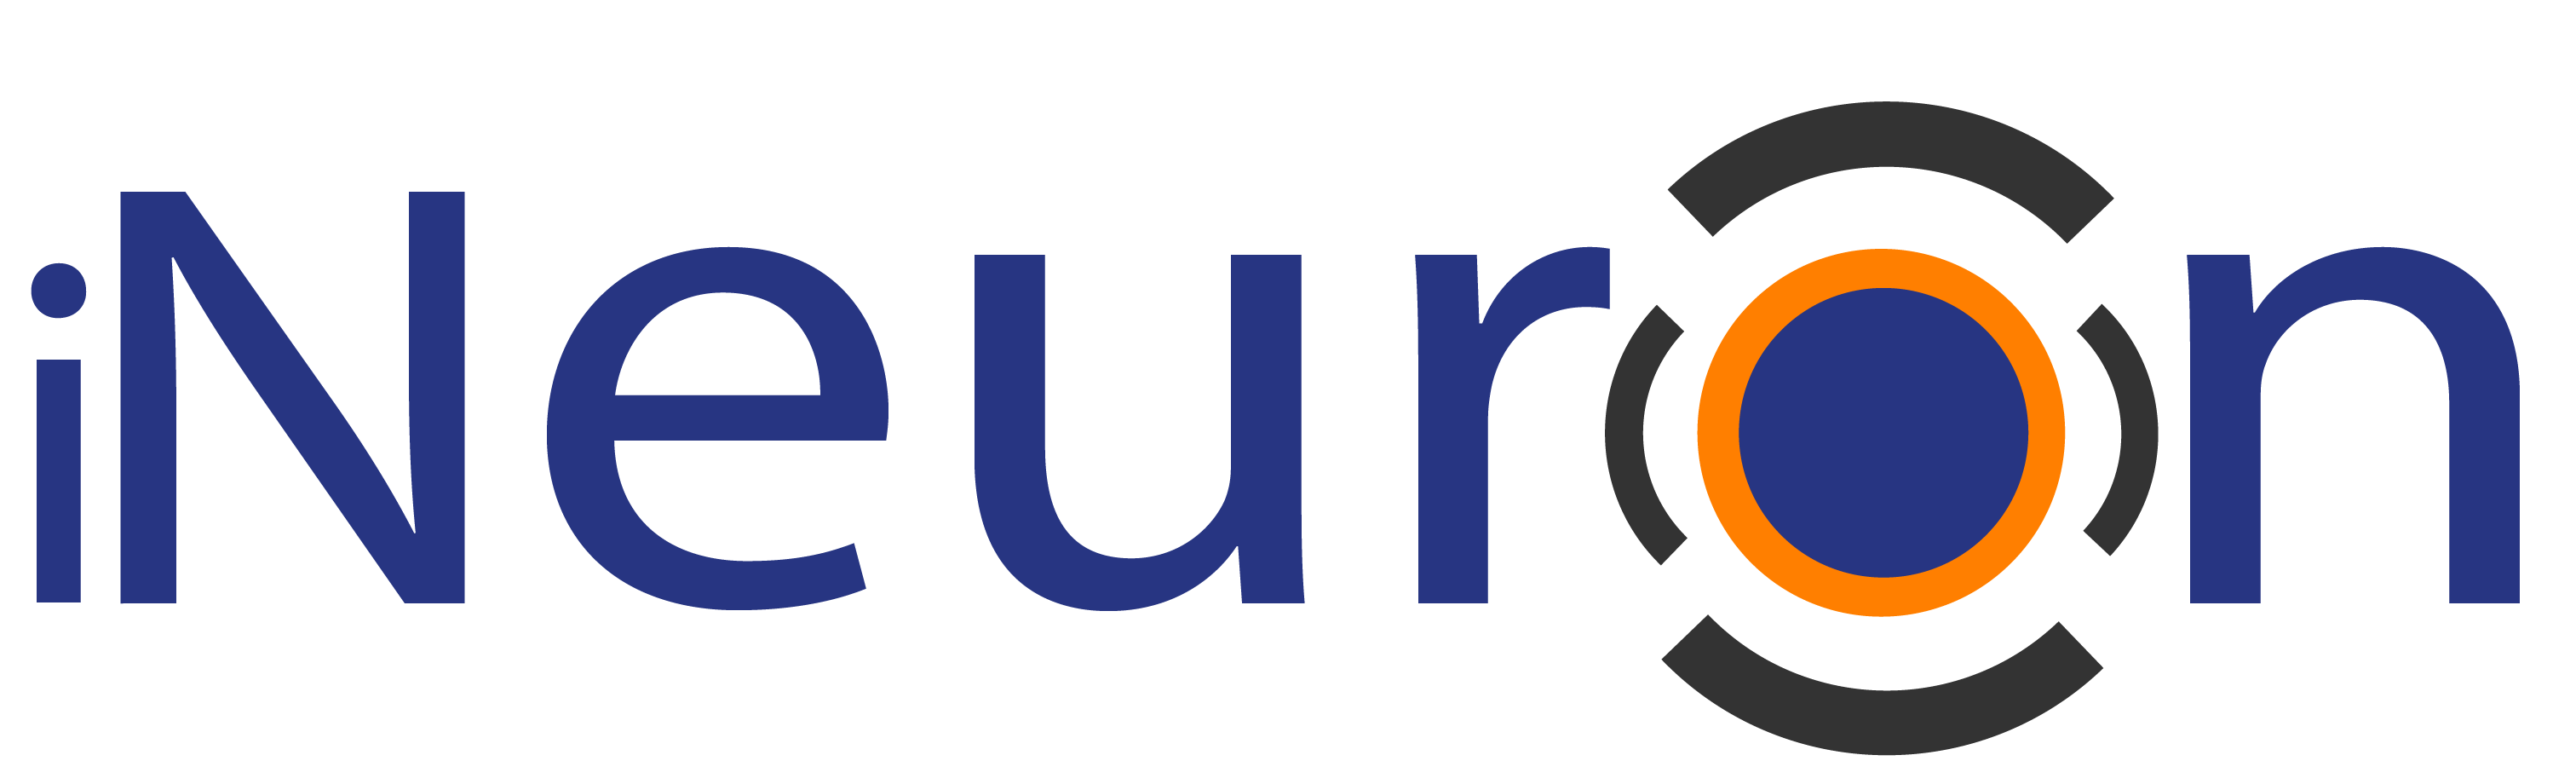

# Class - 55  `Naive Bayes`

## 7 December 2022
In this class **Sunny Savita Sir** taught the theory of **Naive Bayes** 

## Application Flow

Before proceeding with the algorithm, let’s first discuss the lifecycle of any machine learning model. This diagram explains the creation of a Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. 
A typical lifecycle diagram for a machine learning model looks like:

<img src="MLApplicationFlow.PNG" width= "300">

##### Bayes’s Theorem

According to the Wikipedia, In probability theory and statistics,**Bayes’s theorem** (alternatively *Bayes’s law* or *Bayes’s rule*) describes the probability of an event, based on prior knowledge of conditions that might be related to the event.
Mathematically, it can be written as:

<img src=formula.PNG width=300>

Where A and B are events and P(B)≠0
* P(A|B) is a conditional probability: the likelihood of event A occurring given that B is true.
* P(B|A) is also a conditional probability: the likelihood of event B occurring given that A is true.
* P(A) and P(B) are the probabilities of observing A and B respectively; they are known as the marginal probability.


Let’s understand it with the help of an example:

**The problem statement:**

There are two machines which manufacture bulbs. Machine 1 produces 30 bulbs per hour and machine 2 produce 20 bulbs per hour. Out of all bulbs produced, 1 % turn out to be defective. Out of all the defective bulbs, the share of each machine is 50%.  What is the probability that a bulb produced by machine 2 is defective?

We can write the information given above in mathematical terms as:

The probability that a bulb was made by Machine 1, P(M1)=30/50=0.6

The probability that a bulb was made by Machine 2, P(M2)=20/50=0.4

The probability that a bulb is defective, P(Defective)=1%=0.01

The probability that a defective bulb came out of Machine 1, P(M1 | Defective)=50%=0.5

The probability that a defective bulb came out of Machine 2, P(M2 | Defective)=50%=0.5

Now, we need to calculate the probability of a bulb produced by machine 2 is defective i.e.,
P(Defective | M2).
Using the Bayes Theorem above, it can be written as:

$P(Defective | M2)=\frac { P(M2 | Defective) * P(Defective)} { P(M2)}$

Substituting the values, we get:$P(Defective | M2)=\frac {0.5*0.01}{0.4}= 0.0125$

Task for you is to calculate the probability that a bulb produced by machine 1 is defective.


We’ll extend this same understanding to understand the Naïve Baye’s Algorithm.

#### Algorithm steps:

1.	Let’s consider that we have a binary classification problem i.e., we have two classes in our data as shown below.
<img src=fig1.PNG width=300>
2.	Now suppose if we are given with a new data point, to which class does that point belong to?
<img src=fig2.PNG width=300>
3.	The formula for a point ‘X’ to belong in class1 can be written as:
<img src=fig3.PNG width=300>
Where the numbers represent the order in which we are going to calculate different probabilities.
4.	A similar formula can be utilised for class 2 as well.
5.	Probability of class 1 can be written as:
$P(class1)=\frac{Number of points in class1}{Total number of points}= \frac {16}{26}=0.62$
6.	For calculating the probability of X, we draw a circle around the new point and see how many points(excluding the new point) lie inside that circle.
<img src=fig4.PNG width=300>

The points inside the circle are considered to be similar points. 
$P(X)=\frac{Number of similar observation}{Total Observations}=\frac {3}{26}=0.12$
7.	Now, we need to calculate the probability of a point to be in the circle that we have made given that it’s of class 1.
$P(X | Class1)= \frac {Number of points in class 1 inside the circle}{Total number of points in class 1}=\frac{1}{16}=0.06$
8.	We can substitute all the values into the formula in step 3. We get:
$P(Class1 | X)=\frac{0.06*0.62}{0.12}=0.31$
9.	And if we calculate the probability that X belongs to Class2, we’ll get 0.69. It means that our point belongs to class 2.


##### The Generalization for Multiclass:

The approach discussed above can be generalised for multiclass problems as well. 
Suppose, P1, P2, P3…Pn are the probabilities for the classes C1,C2,C3…Cn, then the point X will belong to the class for which the probability is maximum. Or mathematically the point belongs to the result of : $ argmax(P1,P2,P3….Pn)$


##### The Difference
You can notice a major difference in the way in which the Naïve Bayes algorithm works form other classification algorithms. It does not first try to learn how to classify the points. It directly uses the label to identify the two separate classes and then it predicts the class  to which the new point shall belong.

##### Why it is called Naïve Bayes?
The entire algorithm is based on Bayes’s theorem to calculate probability. So, it also carries forward the assumptions for the Bayes’s theorem. But those assumptions(that the features are independent) might not always be true when implemented over a real-world dataset. So, those assumptions are considered _Naïve_ and hence the name.


### Gaussian Naive Bayes

When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a Gaussian distribution. Go back to the normal distribution lecture to review the formulas for the Gaussian/Normal Distribution.

For example of using the Gaussian Distribution, suppose the training data contain a continuous attribute, x. We first segment the data by the class, and then compute the mean and variance of x in each class. Let  μ<sub>c</sub> be the mean of the values in x associated with class c, and let  σ<sup>2</sup><sub>c</sub> be the variance of the values in x associated with class c. Then, the probability distribution of some value given a class, p(x=v|c), can be computed by plugging v into the equation for a Normal distribution parameterized by μ<sub>c</sub> and  σ<sup>2</sup><sub>c</sub>. That is:

$$p(x=v|c)=\frac{1}{\sqrt{2\pi\sigma^2_c}}\,e^{ -\frac{(v-\mu_c)^2}{2\sigma^2_c} }$$


#### Python Implementation

In [2]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitplot as skl
sns.set()

In [22]:
data = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv") # Reading the Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.

In [5]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [6]:
# Handling the Outliers

q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

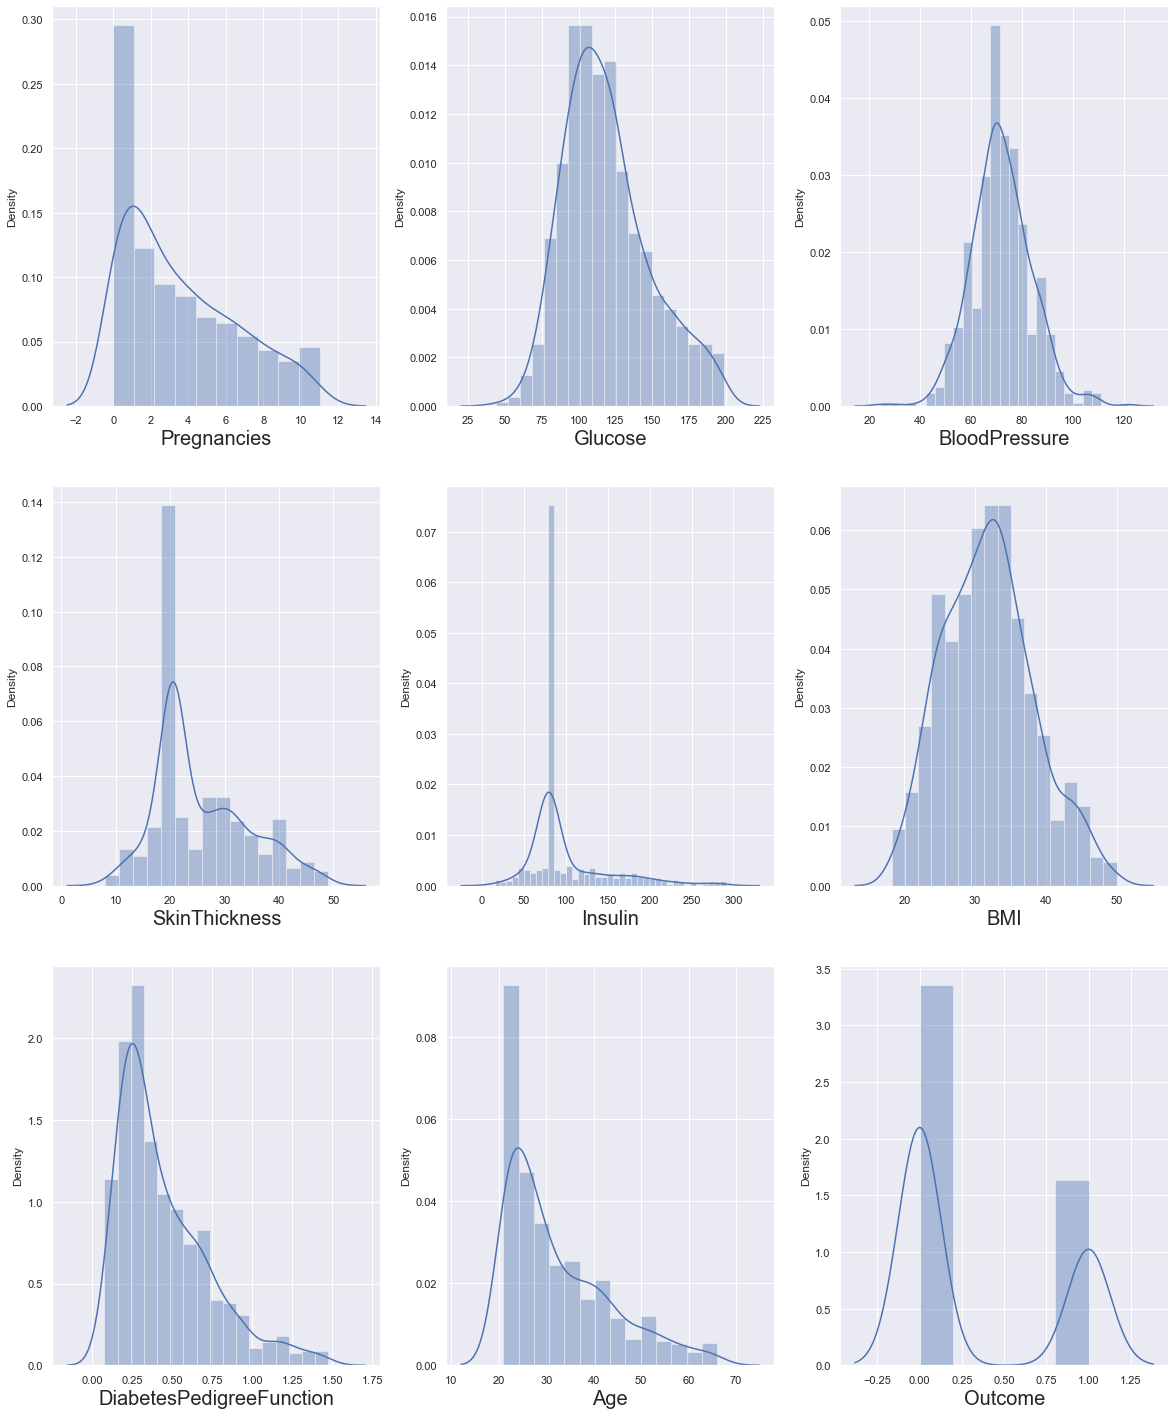

In [7]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [8]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [10]:
# we need to scale our data as well

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [11]:
# This is how our data looks now after scaling.
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [12]:
# now we will check for multicollinearity using VIF(Variance Inflation factor)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


All the VIF values are less than 5 and are very low. That means no multicollinearity. 
Now, we can go ahead with fitting our data to the model.
Before that, let's split our data in test and training set.

In [13]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [15]:
model.fit(x_train,y_train)

GaussianNB()

In [18]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(model,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [16]:
y_pred = model.predict(x_test)

In [19]:
accuracy_score(y_test, y_pred)*100

78.64583333333334

In [20]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[109,  16],
       [ 25,  42]], dtype=int64)

In [21]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [24]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7864583333333334

In [25]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.872

In [26]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8134328358208955

In [27]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8416988416988417

In [28]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7494328358208956

So far we have been doing  grid search to maximise the accuracy of our model.
 Here, we’ll follow a different approach. We’ll create two models, one with Logistic regression and other with Naïve Bayes and we’ll compare the AUC. The algorithm having a better AUC shall be considered for production deployment.


In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

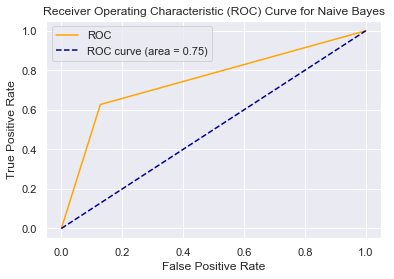

In [46]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\Users\virat\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
y_pred_logistic = log_reg.predict(x_test)

In [35]:
accuracy_logistic = accuracy_score(y_test,y_pred_logistic)
accuracy_logistic

0.7552083333333334

In [36]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_logistic)
conf_mat

array([[110,  15],
       [ 32,  35]], dtype=int64)

In [37]:
# ROC
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_logistic)


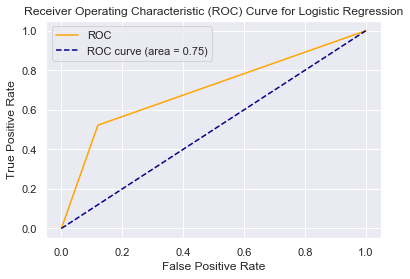

In [38]:
plt.plot(fpr_logistic, tpr_logistic, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend()
plt.show()

In [40]:
from sklearn.metrics  import roc_auc_score

In [41]:
auc_naive=roc_auc_score(y_test,y_pred)
auc_naive

0.7494328358208956

In [42]:
auc_logistic=roc_auc_score(y_test,y_pred_logistic)
auc_logistic

0.7011940298507463

Here, you can see that the AUC for Naïve Bayes is more. So, we’ll take that as our production-ready model.

**Advantages:**

* Naive Bayes is extremely fast for both training and prediction as they not have to learn to create separate classes.
* Naive Bayes provides a direct probabilistic prediction.
* Naive Bayes is often easy to interpret.
* Naive Bayes has fewer (if any) parameters to tune


**Disadvantages:**

* The algorithm assumes that the features are independent which is not always the scenario
* Zero Frequency i.e. if the category of any categorical variable is not seen in training data set even once then model assigns a zero probability to that category and then a prediction cannot be made.



### Cloud Deployment

Once the training is completed, we need to expose the trained model as an API for the user to consume it. For prediction, the saved model is loaded first and then the predictions are done using it. If the web app works fine, the same app is deployed to the cloud platform.
The flow for that can be shown as:

<img src="testing_pipeline.PNG">

We'll deploy this model to the AWS Cloud Platform.

**Pre-requisites for Cloud Deployment:**
* Basic knowledge of flask framework.
* Any Python IDE installed(we are using PyCharm).
* An AWS account.
* Basic understanding of HTML.

**The Flask App:**
As we’ll expose the created model as a web API to be consumed by the client/client APIs, we’d do it using the flask framework. 

* Create the project structure, as shown below:
<img src="project_structure.PNG">

The content for **application.py** is:

```python
from flask import Flask, request, app
from flask import Response
from flask_cors import CORS
from nb_deploy import predObj

application = Flask(__name__) # initializing a flask app
app=application
CORS(app)
app.config['DEBUG'] = True


class ClientApi:

    def __init__(self):
        self.predObj = predObj()

@app.route("/predict", methods=['POST'])
def predictRoute():
    try:
        if request.json['data'] is not None:
            data = request.json['data']
            print('data is:     ', data)
            pred=predObj()
            res = pred.predict_log(data)

            #result = clntApp.predObj.predict_log(data)
            print('result is        ',res)
            return Response(res)
    except ValueError:
        return Response("Value not found")
    except Exception as e:
        print('exception is   ',e)
        return Response(e)


if __name__ == "__main__":
    clntApp = ClientApi()
    host = '0.0.0.0'
    port = 5000
    app.run(debug=True)
    #httpd = simple_server.make_server(host, port, app)
    # print("Serving on %s %d" % (host, port))
    #httpd.serve_forever()
```

The content for **nb_deploy.py** is:

```python
#Let's start with importing necessary libraries
import pickle
import pandas as pd

class predObj:

    def predict_log(self, dict_pred):
        with open("standardScalar.sav", 'rb') as f:
            scalar = pickle.load(f)

        with open("modelForPrediction.sav", 'rb') as f:
            model = pickle.load(f)
        data_df = pd.DataFrame(dict_pred,index=[1,])
        scaled_data = scalar.transform(data_df)
        predict = model.predict(scaled_data)
        #predict = model.predict(data_df)
        if predict[0] ==1 :
            result = 'Diabetic'
        else:
            result ='Non-Diabetic'

        return result
```

The content for **python.config** is:

```python
option_settings:
  "aws:elasticbeanstalk:container:python":
    WSGIPath: application.py

files:
  "/etc/httpd/conf.d/wsgi_custom.conf":
    mode: "000644"
    owner: root
    group: root
    content: |
      WSGIApplicationGroup %{GLOBAL}
```

**Points to consider before deployment**
* The python application file should be named application.py
* Create a requirements.txt using **pip freeze > requirements.txt** from the project folder
* Create a folder **.ebextensions** and create a file **python.config** inside it. Make sure to populate the content of python.config, as shown above.
* Create the zip file from the project folder itself.

<img src="zip.PNG" width="300">


**Deployment Process**

* Go to https://aws.amazon.com/ and create an account if already don’t have one.
* Go to the console and go to the ‘Build a web app’ section and click it.
 <img src="aws_buildapp.PNG" width="300">

* Give the name of the application, give platform as python, and select the option to upload your code.

<img src="app_creation.PNG" width="300">

* Click on Create application to upload your code and create the app

Final Result:
    <img src="final_result.PNG" width="300">